In [1]:
import matplotlib.pyplot as plt
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Random Numbers

Documentation: https://docs.scipy.org/doc/numpy/reference/routines.random.html


Numpy gives us the ability to select random numbers from a variety of different distribution functions (see the np.random documentation for a full list). However, the two most frequently used distributions are 

- the uniform distribution: np.random.rand
- the normal (Gaussian) distribution: np.random.randn

The uniform distribution (rand) gives numbers uniformly distributed over the interval [0,1) and takes the size of the desired output array as an argument.


First, let's generate a vector of length 5 populated with 5 uniformly distributed random numbers

In [2]:
np.random.rand(5)

array([ 0.83001512,  0.91109234,  0.41417746,  0.33686214,  0.42845261])

We can also generate arrays by specifying the size in each dimension.

In [5]:
np.random.rand(5,5)

array([[ 0.49405361,  0.47136281,  0.69710106,  0.02723072,  0.69405772],
       [ 0.77997762,  0.16898496,  0.93264787,  0.74918778,  0.74893914],
       [ 0.82576403,  0.73013842,  0.93625255,  0.33679084,  0.71966784],
       [ 0.1705671 ,  0.97690606,  0.01820588,  0.89019177,  0.97736417],
       [ 0.53873605,  0.46179508,  0.74782234,  0.7887653 ,  0.73975286]])

So, it turns out that np.random does not give us truly random numbers, but what are called "pseudo-random" numbers. The random numbers that we get are based on a 'seed' number. By default, this seed is chosen based off of a different random generator. However, we have the option to specify the seed.

In practice, you will normally not specify the seed so that you get a new set of random numbers. However, it can be useful for debugging or analysis purposes to pick a seed so that you get the exact same set each time the program is run. Try re-running the cell above a few times and notice how the numbers are different each time. Next, run the cell below multiple times, and notice how the result is always the same

In [7]:
np.random.seed(1337)
np.random.rand(5,5)

array([[ 0.26202468,  0.15868397,  0.27812652,  0.45931689,  0.32100054],
       [ 0.51839282,  0.26194293,  0.97608528,  0.73281455,  0.11527423],
       [ 0.38627507,  0.62850118,  0.12505793,  0.98354861,  0.44322487],
       [ 0.78955834,  0.79411858,  0.36126157,  0.41610394,  0.58425813],
       [ 0.76017177,  0.18780841,  0.28816715,  0.67021886,  0.49964826]])

The normal distribution selects random numbers from a Gaussian curve (sometimes called a bell curve), which is given by

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

(FYI: don't panic if this part is confusing right now, we're going to explore the Gaussian more in just a bit)

np.random.randn selects numbers from this standard normal distribution, which is the gaussian for $\mu=0$ and $\sigma=1$. It takes a shape argument just like rand does


In [8]:
np.random.randn(5)

array([-0.33267992, -1.23112306,  0.14860042, -1.41011215, -0.40859609])

# Histograms
Documentation: http://matplotlib.org/1.2.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist

Understanding these normal distributions is perhaps best done by plotting them in a histogram. Fortunately, matplotlib makes that very simple for us

plt.hist takes,at minimum, a vector of values that we want to generate a histogram of. We can also specify the number of bins

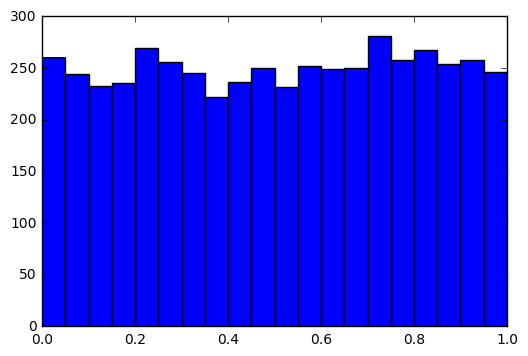

In [9]:
X = np.random.rand(5000)
N,bins,patches = plt.hist(X, bins=20)

You can go ahead and vary the length of the random array or the number of bins and see how random noise effects the output.

Now, let's take a look at the gaussian distribution using a histogram. Generate a vector of length 5000 from the normal distribution and plot a histogram with 50 bins

In [ ]:
#Put your code here

A gaussian with mean zero and standard deviation one is not particularly interesting. However we can transform the distribution given by np.random.randn() using simple arithmetic:

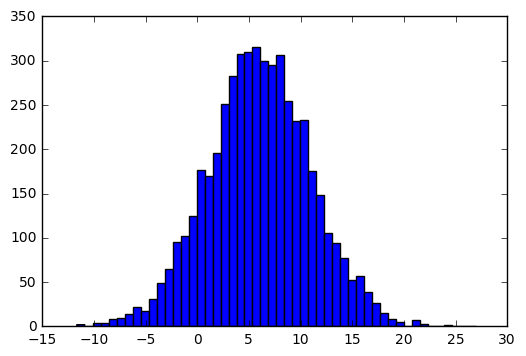

In [10]:
mu = 6 #the mean of the distribution
sigma = 5 #the standard deviation

X = sigma * np.random.randn(5000) + mu
N,bins,patches = plt.hist(X,bins=50)

Vary the values of mu and sigma in the above code to see how the mean affects the center of the distribution and the standard deviation affects the width.

Numpy also gives us the ability to calculate the mean and standard deviation of a distribution

In [ ]:
mean = np.mean(X)
std = np.std(X)
print('mean: '+ repr(mean) )
print('standard deviation: ' + repr(std))

Ok, so generating random numbers and then getting statistics about them is not particularly helpful, so let's try working with some real data. First, we'll import a list of fluorescence lifetimes in nanoseconds from Nitrogen-Vacancy defects in diamond 

(While it is not at all necessary to understand the physics behind this, this is real data! You can read more about it at http://www.nature.com/articles/ncomms11820 if you are so inclined. This data is from Fig. 6a)

In [ ]:
lifetimes = np.loadtxt('Data/LifetimeData.txt')

Next, plot a histogram of this data set (play around with the number of bins, too)

In [ ]:
#Put your code here


Now, calculate and print the mean and standard deviation of this distribution

In [ ]:
#Put your code here


## Bonus Material?
Let's try and overlay a Gaussian curve on top of the histogram we just plotted. To do that, we are first going to need to define a function for the Gaussian. Name your function `gaussian` and have it take the arguments `X, sigma, mu`

remember, a Gaussian is defined by $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

In [ ]:
#put your code here


Now lets check to see if your function is correct by plotting it

In [12]:
X = np.arange(0,15,0.1)
sigma = 2
mu = 6
plt.plot(X,gaussian(X,sigma,mu),'r-')

NameError: name 'gaussian' is not defined

If your gaussian is correct, your plot should look like this: 

![gaussian](Data/gaussian.png)

Now, re-plot the histogram of lifetimes from above, but also overlay a plot of the gaussian curve with the same mean and standard deviation from the lifetime distribution. It's important to notice that the gaussian curve is normalized to have a sum under the curve equal to one, but the histogram does not! Fortunately, we can fix this by adding `normed=True` to the list of arguments passed to `plt.hist`

In [ ]:
#Put your Code Here


# Linear Regression

Documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

When analyzing experimental data, we frequently would like to be able to fit theoretical models to match our results. You might have already used linear regression in a previous science course (In Excel, this is done with the LINEST function) The simplest case of that is fitting a straight line to a collection of data. This is done through a method known as linear regression. Since we don't have time to teach an entire statistics course, we will say that linear regression minimizes the total distance between each data point and best-fit line. 

First, lets load a set of data and plot it to see how it looks

In [ ]:
data = np.loadtxt('Data/scatter1.txt')
plt.plot(data[:,0],data[:,1],'ko')

Looking at the data gives us a pretty good idea that there is a linear relationship between the two variables. Now, we're gonna use `linregress` from the `scipy.stats` module to do a linear fit

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,0],data[:,1])
print("slope: "+repr(slope))
print("intercept: "+repr(intercept))
print("R squared: "+repr(r_value**2))

`stats.linregress` gives us quite a few pieces of output! First, it gives us the slope, $m$, and the intercept, $b$, for the best fit line (remember $y = mx +b$) It also gives us the $R^2$ value, which gives a general sense of the strength of the linear relationship between the x and y variables. $R^2$ varies between the values 0 and 1, with 1 indicating complete linearity and 0 indicating no linearity. Often, we will us $R^2$ to determine if a fit is "good", but we should always be careful when using statistics...

Now, lets go ahead and replot the scatter1.txt data from above, but then overlay the line of best fit using the slope and intercept from above

In [ ]:
#Your Code Here


When you're done, you should have a plot like this:
![scatter plot](Data/scatter1-fit.png)